#### Xây dựng mô hình phân loại cho Ứng dụng trên Google Play Store 

In [582]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np


In [583]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


TIỀN XỬ LÝ DỮ LIỆU 

In [585]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [586]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [587]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [588]:
df = df[df['Reviews'].str.isnumeric()]
df['Reviews'].astype(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

In [589]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [590]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [591]:
df_copy=df.copy()

In [592]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [593]:
df_copy=df_copy.drop(df_copy.index[10472])

In [594]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [595]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10838 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [596]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [597]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [598]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [599]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10839, dtype: float64

In [600]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [601]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [602]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [603]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [604]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [605]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [606]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            9144 non-null   float64
 5   Installs        10839 non-null  int64  
 6   Type            10838 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [607]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [608]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [609]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10839 non-null  object        
 1   Category        10839 non-null  object        
 2   Rating          9365 non-null   float64       
 3   Reviews         10839 non-null  int64         
 4   Size            9144 non-null   float64       
 5   Installs        10839 non-null  int64         
 6   Type            10838 non-null  object        
 7   Price           10839 non-null  float64       
 8   Content Rating  10839 non-null  object        
 9   Genres          10839 non-null  object        
 10  Last Updated    10839 non-null  datetime64[ns]
 11  Current Ver     10831 non-null  object        
 12  Android Ver     10837 non-null  object        
 13  Day             10839 non-null  int32         
 14  Month           10839 non-null  int32         
 15  Year   

In [610]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [611]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [612]:
df=pd.read_csv('google_cleaned.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [613]:
df_copy = df.copy()

In [ ]:
# Đổi tên cột 'Unnamed: 0' thành 'Index'
df_copy.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [ ]:
df_copy.set_index('Index', inplace=True)

In [ ]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [ ]:
# Xem max, min, mean, std của các cột trong df
df_copy.describe()


,Rating,Reviews,Size,Installs,Price,Last Updated,Day,Month,Year
count,9365.000000,1.083900e+04,9144.000000,1.083900e+04,10839.000000,10839,10839.000000,10839.000000,10839.000000
mean,4.191757,4.441815e+05,19581.560696,1.546484e+07,1.027463,2017-11-21 06:08:40.121782272,15.609835,6.422179,2017.399668
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,2010-05-21 00:00:00,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000,2017-09-20 00:00:00,6.000000,5.000000,2017.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000,2018-05-24 00:00:00,16.000000,7.000000,2018.000000
75%,4.500000,5.464400e+04,30000.000000,5.000000e+06,0.000000,2018-07-20 00:00:00,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,2018-08-08 00:00:00,31.000000,12.000000,2018.000000
std,0.515246,2.927894e+06,24042.505080,8.503327e+07,15.950436,NaN,9.561704,2.578463,1.100950


In [ ]:
# Điền các giá trị null bằng giá trị trung vị
df_copy['Size'].fillna(df_copy['Size'].median(), inplace=True)
df_copy['Price'].fillna(df_copy['Price'].median(), inplace=True)
df_copy['Installs'].fillna(df_copy['Installs'].median(), inplace=True)
df_copy['Rating'].fillna(df_copy['Rating'].median(), inplace=True)
df_copy['Type'].fillna(df_copy['Type'].mode()[0], inplace=True)
df_copy['Content Rating'].fillna(df_copy['Content Rating'].mode()[0], inplace=True)
df_copy['Current Ver'].fillna(df_copy['Current Ver'].mode()[0], inplace=True)
df_copy['Last Updated'].fillna(df_copy['Last Updated'].mode()[0], inplace=True)
df_copy['Category'].fillna(df_copy['Category'].mode()[0], inplace=True)
df_copy['Genres'].fillna(df_copy['Genres'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18708\2730991266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Size'].fillna(df_copy['Size'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18708\2730991266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [ ]:
# Chuyển các cột thành cột phân loại
df_copy['Category'] = df['Category'].str.replace('_', ' ')
df_copy['Price_Category'] = df_copy['Type']

# Tạo phân loại Size 
df_copy['Size_Category'] = pd.cut(
    df_copy['Size'], 
    bins=[0, 10000, 30000, 50000, 100000, float('inf')],
    labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
)

# Tạo phân loại Rating
df_copy['Rating_Category'] = pd.cut(
    df_copy['Rating'], 
    bins=[0, 2.5, 3.5, 4.0, 4.5, 5.0],
    labels=['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
)

# Tạo phân loại Installs
df_copy['Install_Category'] = pd.cut(
    df_copy['Installs'],
    bins=[0, 1000, 100000, 10000000, 100000000, float('inf')],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
    include_lowest=True  # Đảm bảo giá trị 0 được bao gồm trong bin đầu tiên
)

# Xem các phân loại đã tạo
df_copy[['Category', 'Type', 'Size_Category', 'Rating_Category', 'Install_Category']].head()

,Category,Type,Size_Category,Rating_Category,Install_Category
0,ART AND DESIGN,Free,Small,Very Good,Low
1,ART AND DESIGN,Free,Small,Good,Medium
2,ART AND DESIGN,Free,Very Small,Excellent,Medium
3,ART AND DESIGN,Free,Small,Very Good,High
4,ART AND DESIGN,Free,Very Small,Very Good,Low


In [ ]:
df_copy.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         2
Day                 0
Month               0
Year                0
Price_Category      0
Size_Category       0
Rating_Category     0
Install_Category    0
dtype: int64

In [ ]:
# Xuất dữ liệu đã xử lý ra file CSV
df_copy.to_csv('google_play_processed.csv', index=False)

XÂY DỰNG MÔ HÌNH K-MEANS 

In [ ]:
# Chọn những feature cần thiết cho K-means
features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 
            'Day', 'Month', 'Year']

# Chuẩn hóa Content Rating
le_content = LabelEncoder()
df_copy['Content_Rating_Encoded'] = le_content.fit_transform(df_copy['Content Rating'])
features.append('Content_Rating_Encoded')

# Chuẩn hóa Type_Encoded
df_copy['Type_Encoded'] = df_copy['Type'].map({'Free': 0, 'Paid': 1})
features.append('Type_Encoded')

# Tạo biến X và Y 
X = df_copy[features]
y = df_copy['Category']

# Chuẩn hóa biến phân loại y 
le_category = LabelEncoder()
y_encoded = le_category.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (7587, 10)
Testing set shape: (3252, 10)


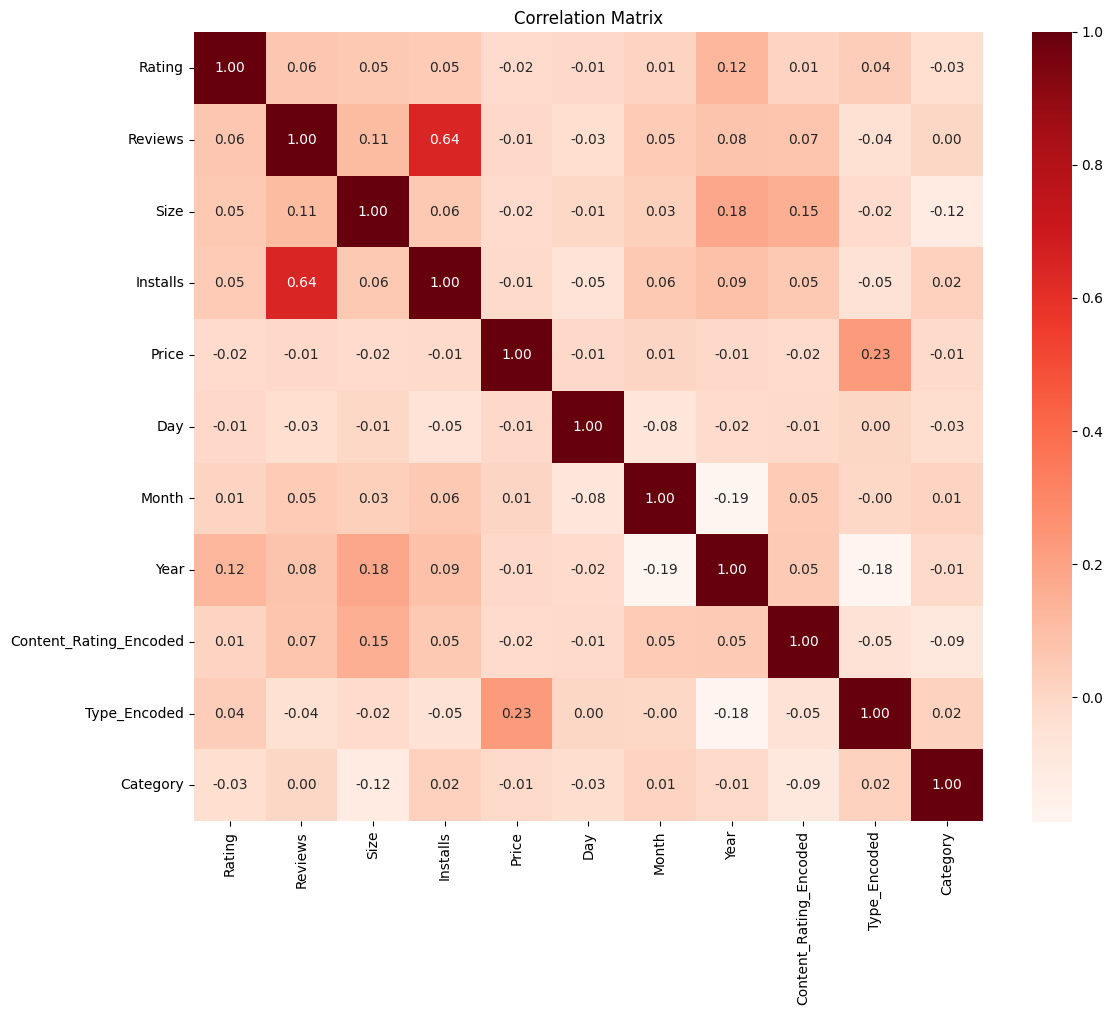

In [ ]:
# Xem tương quan để giảm chiều dữ liệu
df_corr = X.copy()
df_corr['Category'] = y_encoded
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='Reds', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


TẠO WORDCLOUD CHO CÁC TỪ KHÓA PHỔ BIỂN CHO NHỮNG ỨNG DỤNG ĐƯỢC INSTALL NHIỀU NHẤT 

In [ ]:
# Chuyển đổi cột Category sang dạng string (đảm bảo đúng định dạng)
df_copy['Category'] = df_copy['Category'].astype(str)

# Áp dụng TF-IDF cho cột Category
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['Category'])

print(f"Kích thước ma trận TF-IDF: {tfidf_matrix.shape}")
print(f"Các đặc trưng TF-IDF: {tfidf_vectorizer.get_feature_names_out()}")


Kích thước ma trận TF-IDF: (10839, 44)
Các đặc trưng TF-IDF: ['art' 'auto' 'beauty' 'books' 'business' 'comics' 'communication'
 'dating' 'demo' 'design' 'drink' 'education' 'entertainment' 'events'
 'family' 'finance' 'fitness' 'food' 'game' 'health' 'home' 'house'
 'libraries' 'lifestyle' 'local' 'magazines' 'maps' 'medical' 'navigation'
 'news' 'parenting' 'personalization' 'photography' 'players'
 'productivity' 'reference' 'shopping' 'social' 'sports' 'tools' 'travel'
 'vehicles' 'video' 'weather']


In [ ]:
# Loại bỏ các ký tự đặc biệt và chuyển về chữ thường
df_copy['App_Clean'] = df_copy['App'].astype(str).str.lower()
df_copy['App_Clean'] = df_copy['App_Clean'].str.replace(r'[^\w\s]', ' ', regex=True)

def extract_main_keywords(app_name):
    if not isinstance(app_name, str):
        return "unknown"
        
    # Loại bỏ các từ ít quan trọng (stop words)
    stop_words = ['and', 'with', 'for', 'the', 'a', 'an', 'in', 'on', 'at', 'by', 
                  'to', 'from', 'of', 'lite', 'free', 'cool', 'hide', '...']
    
    # Phân tách bằng dấu cách, dấu & và dấu -
    words = str(app_name).replace('&', ' ').replace('-', ' ').split()
    
    # Loại bỏ stop words
    keywords = [word for word in words if word.lower() not in stop_words]
    
    # Nếu còn ít nhất một từ khóa, trả về từ đầu tiên (thường là quan trọng nhất)
    if keywords:
        return keywords[0]
    return "unknown"  # Nếu không tìm thấy từ khóa nào

# Áp dụng hàm
df_copy['Main_App'] = df_copy['App'].apply(extract_main_keywords)

# Xử lý dữ liệu App để loại bỏ ký tự không hợp lệ
df_copy['App_Processed'] = df_copy['App'].astype(str)
# Loại bỏ các ký tự không phải ASCII (bao gồm tiếng Hàn, tiếng Trung, ...)
df_copy['App_Processed'] = df_copy['App_Processed'].str.replace(r'[^\x00-\x7F]+', ' ', regex=True)
# Loại bỏ các ký tự đặc biệt và giữ lại chữ cái, số và khoảng trắng
df_copy['App_Processed'] = df_copy['App_Processed'].str.replace(r'[^a-zA-Z0-9\s]', ' ', regex=True)
# Loại bỏ nhiều khoảng trắng liên tiếp
df_copy['App_Processed'] = df_copy['App_Processed'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Kiểm tra nếu có NaN hoặc chuỗi rỗng, thay thế bằng "unknown"
df_copy['App_Processed'] = df_copy['App_Processed'].fillna("unknown")
df_copy.loc[df_copy['App_Processed'] == '', 'App_Processed'] = "unknown"

# Kiểm tra xem còn dữ liệu nào trống không
print(f"Số lượng giá trị trống hoặc NaN trong App_Processed: {(df_copy['App_Processed'] == '') | (df_copy['App_Processed'].isna()).sum()}")

# Tạo danh sách các từ dừng (stop words) tùy chỉnh
additional_stops = ['bg','bt','dr', 'eu', 'ah', 'cg', 'fk', 'hd', 'ht', 'hu', 'it', 'jp', 'kr', 'my', 'pl', 'pt', 'ru', 'sg', 'th', 'ua', 'vn', 'ec', 'uk', 'us', 'ca', 'au', 'de', 'fr', 'es', 'it', 'jp', 'kr', 'cn', 'tw', 'hk', 'id', 'br', 'mx', 'ar', 'sa', 'ae']
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS.union(additional_stops))

# Áp dụng TF-IDF cho cột App_Processed
try:
    tfidf_vect = TfidfVectorizer(stop_words=custom_stop_words, min_df=2, max_features=5000)
    tfidf_matrix_app = tfidf_vect.fit_transform(df_copy['App_Processed'])
    
    print(f"Kích thước ma trận TF-IDF cho App: {tfidf_matrix_app.shape}")
    print(f"Số lượng đặc trưng TF-IDF cho App: {len(tfidf_vect.get_feature_names_out())}")
    print(f"Một số đặc trưng TF-IDF cho App: {list(tfidf_vect.get_feature_names_out())[:20]}")
    
    # Kiểm tra các đặc trưng có trọng số cao
    feature_names = tfidf_vect.get_feature_names_out()
    tfidf_sum = tfidf_matrix_app.sum(axis=0).A1
    
    # Lấy top 20 từ có trọng số cao nhất
    top_words_indices = tfidf_sum.argsort()[-20:][::-1]
    top_words = [(feature_names[i], tfidf_sum[i]) for i in top_words_indices]
    
    print("\nTop 20 từ có trọng số cao nhất trong App:")
    for word, score in top_words:
        print(f"{word}: {score:.4f}")
        
except Exception as e:
    print(f"Lỗi khi áp dụng TF-IDF: {str(e)}")

Số lượng giá trị trống hoặc NaN trong App_Processed: 0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: App_Processed, Length: 10839, dtype: bool
Kích thước ma trận TF-IDF cho App: (10839, 3463)
Số lượng đặc trưng TF-IDF cho App: 3463
Một số đặc trưng TF-IDF cho App: ['000', '02', '10', '100', '101', '104', '11', '12', '14', '15', '150', '16', '17', '18', '1800', '1903', '1906', '20', '2012', '2015']

Top 20 từ có trọng số cao nhất trong App:
free: 164.4921
app: 137.0280
mobile: 123.1286
pro: 83.8858
news: 81.8455
video: 80.0070
live: 73.7448
chat: 72.8076
photo: 67.7540
camera: 63.0708
tv: 61.3705
2018: 58.7088
dating: 57.7078
google: 55.6334
editor: 54.9280
theme: 54.2343
manager: 52.7752
calculator: 52.7201
game: 50.9241
android: 50.6887


                                           App    Installs
0                            Google Play Books  1000000000
1     Messenger – Text and Video Chat for Free  1000000000
2                           WhatsApp Messenger  1000000000
3                 Google Chrome: Fast & Secure  1000000000
4                                        Gmail  1000000000
...                                        ...         ...
4995                    Free Panda Radio Music      100000
4996                Offline English Dictionary      100000
4997                          Litnet - E-books      100000
4998          English translation from Bengali      100000
4999         Pdf Book Download - Read Pdf Book      100000

[5000 rows x 2 columns]
Kích thước ma trận TF-IDF cho các ứng dụng được cài đặt nhiều nhất: (5000, 2019)
Số lượng đặc trưng TF-IDF cho các ứng dụng được cài đặt nhiều nhất: 2019
Một số đặc trưng TF-IDF cho các ứng dụng được cài đặt nhiều nhất: ['000', '10', '100', '14', '16', '18', '1800', 

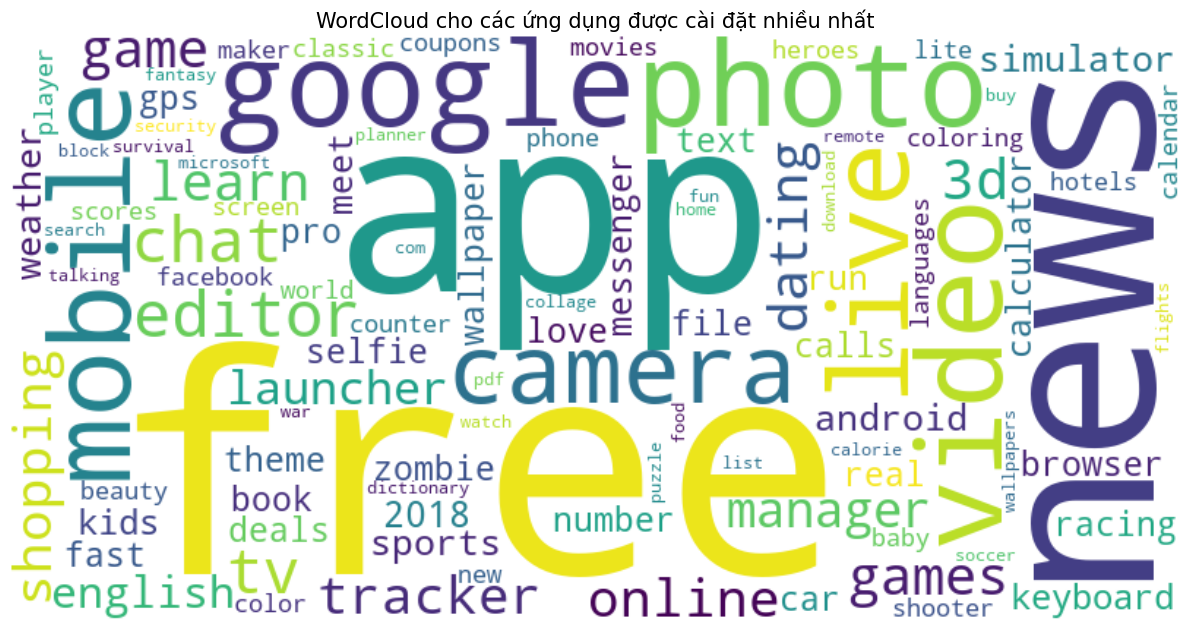

In [ ]:
from wordcloud import WordCloud
# Lấy những ứng đụng được cài đặt nhiều nhất để đưa vào TF-IDF
df_top_installs = df_copy.nlargest(5000, 'Installs')
df_top_installs[['App', 'Installs']].reset_index(drop=True)
print (df_top_installs[['App', 'Installs']].reset_index(drop=True))

# Tạo TF-IDF cho các ứng dụng được cài đặt nhiều nhất
tfidf_vect = TfidfVectorizer(stop_words=custom_stop_words, min_df=2, max_features=5000)

tfidf_matrix_app = tfidf_vect.fit_transform(df_top_installs['App_Processed'])
print(f"Kích thước ma trận TF-IDF cho các ứng dụng được cài đặt nhiều nhất: {tfidf_matrix_app.shape}")
print(f"Số lượng đặc trưng TF-IDF cho các ứng dụng được cài đặt nhiều nhất: {len(tfidf_vect.get_feature_names_out())}")
print(f"Một số đặc trưng TF-IDF cho các ứng dụng được cài đặt nhiều nhất: {list(tfidf_vect.get_feature_names_out())[:20]}")

# Kiểm tra các đặc trưng có trọng số cao
feature_names = tfidf_vect.get_feature_names_out()
tfidf_sum = tfidf_matrix_app.sum(axis=0).A1

# Lấy top 20 từ có trọng số cao nhất
top_words_indices = tfidf_sum.argsort()[-100:][::-1]
top_words = [(feature_names[i], tfidf_sum[i]) for i in top_words_indices]

print("\nTop 20 từ có trọng số cao nhất trong các ứng dụng được cài đặt nhiều nhất:")
for word, score in top_words:
    print(f"{word}: {score:.4f}")


# Tạo WordCloud cho các ứng dụng được cài đặt nhiều nhất
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    max_words=100,
    colormap='viridis',
    contour_width=2, 
    contour_color='steelblue'
)

# Khởi tạo WordCloud từ từ điển trọng số
wordcloud.generate_from_frequencies(dict(top_words))

# Hiển thị WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud cho các ứng dụng được cài đặt nhiều nhất', fontsize=15)
plt.tight_layout()
plt.show()



In [ ]:
# Tạo DataFrame chứa từ khóa và trọng số
tfidf_df = pd.DataFrame({
    'word': [feature_names[i] for i in top_words_indices],
    'score': [tfidf_sum[i] for i in top_words_indices]
})
# Lưu vào CSV
tfidf_df.to_csv('app_keywords_tfidf.csv', index=False)

THỬ GIẢM CHIỀU DỮ LIỆU CHO VECTOR TF-IDF 


Phương sai giải thích được:
Thành phần 1: 0.0084 (0.84%)
Thành phần 2: 0.0090 (0.90%)
Tổng: 0.0175 (1.75%)


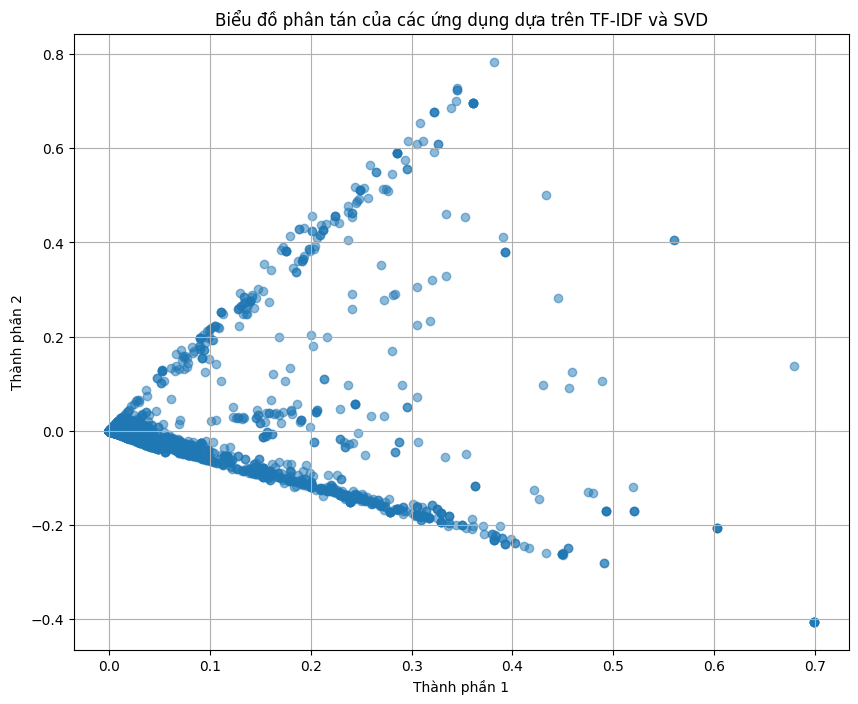

In [ ]:
# Áp dụng SVD để giảm chiều xuống còn 2
svd = TruncatedSVD(n_components=2, random_state=42)
category_svd = svd.fit_transform(tfidf_matrix_app)

# Hiển thị phương sai giải thích được
explained_variance = svd.explained_variance_ratio_
print(f"\nPhương sai giải thích được:")
print(f"Thành phần 1: {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"Thành phần 2: {explained_variance[1]:.4f} ({explained_variance[1]*100:.2f}%)")
print(f"Tổng: {sum(explained_variance):.4f} ({sum(explained_variance)*100:.2f}%)")

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 8))
plt.scatter(category_svd[:, 0], category_svd[:, 1], alpha=0.5)
plt.title('Biểu đồ phân tán của các ứng dụng dựa trên TF-IDF và SVD')
plt.xlabel('Thành phần 1')
plt.ylabel('Thành phần 2')
plt.grid()
plt.show()

Tổng phương sai giải thích được bởi hai thành phần chính đầu tiên chỉ là 1.75%, quá thấp so với ngưỡng kỳ vọng (thường là 70–90%). Do đó, các thành phần này không mang lại nhiều thông tin và không nên đưa vào mô hình phân cụm. 

GIẢM CHIỀU DỮ LIỆU (GỘP NHỮNG FEATURE CÓ TƯƠNG QUAN CAO THÀNH MỘT CHIỀU ĐỂ GIẢM ĐỘ PHỨC TẠP CỦA THAM SỐ)

In [ ]:
# Áp dụng PCA cho dữ liệu phân cụm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Chọn các đặc trưng chính dựa trên ma trận tương quan
selected_features_pca = ['Reviews','Installs']

# Chuẩn bị dữ liệu
X_selected = df_copy[selected_features_pca].fillna(df_copy[selected_features_pca].median())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Áp dụng PCA để giảm chiều dữ liệu
pca = PCA(n_components=1)  # Giảm xuống còn 1 thành phần chính
X_pca = pca.fit_transform(X_scaled)

print(f"Kích thước dữ liệu sau PCA: {X_pca.shape}")zzz
print(f"Phương sai giải thích được: {pca.explained_variance_ratio_}")


Kích thước dữ liệu sau PCA: (10839, 1)
Phương sai giải thích được: [0.82156095]


In [ ]:
# Tạo dữ liệu trước khi phân cụm
X_df = pd.DataFrame(X_pca, columns=['PCA1'])
# Thêm vào đặc trưng của App đã SVD

# Thêm các đặc trưng số từ dữ liệu gốc
numeric_features = ['Rating', 'Price', 'Size', 'Year', 'Content_Rating_Encoded']    
X_df[numeric_features] = df_copy[numeric_features].fillna(X[numeric_features].median())

# XỬ LÝ DỮ LIỆU NULL
X_df = X_df.fillna(X_df.mean())
print(X_df.head())


       PCA1  Rating  Price     Size    Year  Content_Rating_Encoded
0 -0.235762     4.1    0.0  19000.0  2018.0                     1.0
1 -0.231492     3.9    0.0  14000.0  2018.0                     1.0
2 -0.173169     4.7    0.0      8.7  2018.0                     1.0
3  0.232000     4.5    0.0  25000.0  2018.0                     4.0
4 -0.234819     4.3    0.0      2.8  2018.0                     1.0


TÌM K (SỐ CỤM) TỐI ƯU BẰNG PHƯƠNG PHÁP Silhouette_score VÀ Elbow

Với 2 cụm, Silhouette Score là: 0.7092
Với 3 cụm, Silhouette Score là: 0.6273
Với 4 cụm, Silhouette Score là: 0.7341
Với 5 cụm, Silhouette Score là: 0.7723
Với 6 cụm, Silhouette Score là: 0.7799
Với 7 cụm, Silhouette Score là: 0.7817
Với 8 cụm, Silhouette Score là: 0.7783
Với 9 cụm, Silhouette Score là: 0.7810
Với 10 cụm, Silhouette Score là: 0.7812
Với 11 cụm, Silhouette Score là: 0.7782
Với 12 cụm, Silhouette Score là: 0.7657
Với 13 cụm, Silhouette Score là: 0.7719
Với 14 cụm, Silhouette Score là: 0.7658


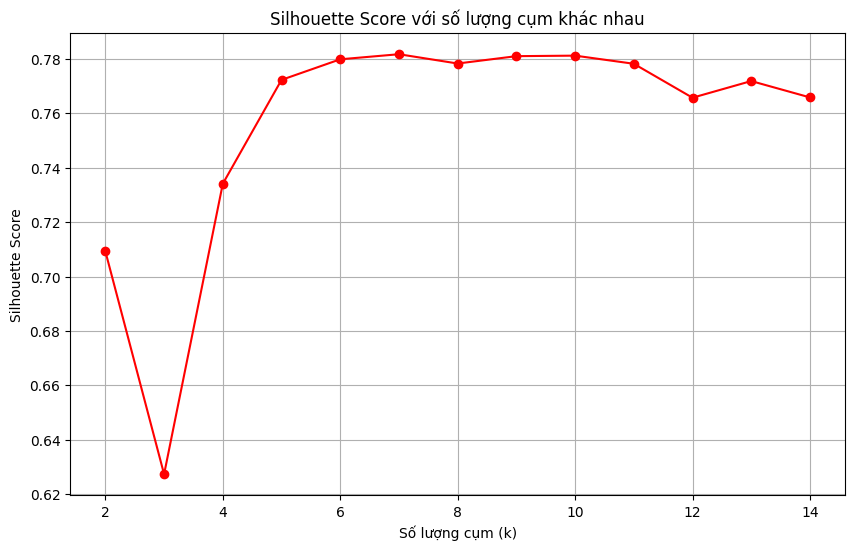

Số lượng cụm tối ưu theo Silhouette Score: 7


In [ ]:
# Tính Silhouette Score cho nhiều giá trị k
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 15)  # Silhouette Score yêu cầu ít nhất 2 cụm

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_df)
    silhouette_avg = silhouette_score(X_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với {k} cụm, Silhouette Score là: {silhouette_avg:.4f}")

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score với số lượng cụm khác nhau')
plt.grid(True)
plt.show()

# Tìm giá trị k cho Silhouette Score cao nhất
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Số lượng cụm tối ưu theo Silhouette Score: {best_k}")

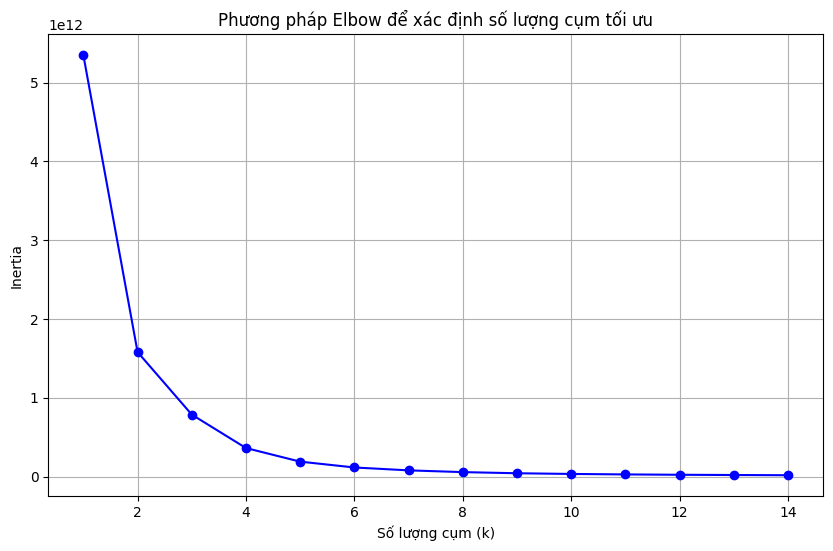

Phần trăm thay đổi inertia:
Từ 1 đến 2 cụm: 70.45%
Từ 2 đến 3 cụm: 50.22%
Từ 3 đến 4 cụm: 53.94%
Từ 4 đến 5 cụm: 47.64%
Từ 5 đến 6 cụm: 39.06%
Từ 6 đến 7 cụm: 31.64%
Từ 7 đến 8 cụm: 28.02%
Từ 8 đến 9 cụm: 25.61%
Từ 9 đến 10 cụm: 20.68%
Từ 10 đến 11 cụm: 17.84%
Từ 11 đến 12 cụm: 16.09%
Từ 12 đến 13 cụm: 13.45%
Từ 13 đến 14 cụm: 13.31%


In [ ]:
# Tìm số lượng cụm tối ưu bằng phương pháp Elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Tính inertia (tổng bình phương khoảng cách) cho nhiều giá trị k
inertia = []
k_range = range(1, 15)  # Thử từ 1 đến 14 cụm

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_df)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để xác định số lượng cụm tối ưu')
plt.grid(True)
plt.show()

# Tính phần trăm thay đổi inertia
inertia_changes = np.diff(inertia) / inertia[:-1] * 100
print("Phần trăm thay đổi inertia:")
for k, change in zip(range(2, 15), inertia_changes):
    print(f"Từ {k-1} đến {k} cụm: {abs(change):.2f}%")

Từ đây cho thấy k=7 tối ưu nhất 

MÔ HÌNH K-MEANS VỚI 7 CỤM 

In [ ]:

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_df)
# Dự đoán nhãn cho dữ liệu
y_kmeans = kmeans.predict(X_df)
# Thêm nhãn phân cụm vào DataFrame
# Thêm nhãn phân cụm vào DataFrame
df_copy['Cluster'] = y_kmeans + 1
X_df['Cluster'] = y_kmeans + 1


In [ ]:
print(df_copy.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART AND DESIGN     4.1   
1                                Coloring book moana  ART AND DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART AND DESIGN     4.7   
3                              Sketch - Draw & Paint  ART AND DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART AND DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510      8.7   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967      2.8    100000  Free    0.0       Everyone   

                      Genres  ... Price_Category Size_Category  \
0               Art & Design  ...           Free         Small   
1  Art & Design;Pret

In [ ]:
# Tách cột Cluster 
X_for_scaling = X_df.drop('Cluster', axis=1) if 'Cluster' in X_df.columns else X_df

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_scaling)


In [ ]:
# thuật toán giảm chiều phi tuyến tính
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Hiển thị kết quả t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['Cluster'] = y_kmeans



In [ ]:
X_df.rename(columns={'Content_Rating_Encoded': 'Content Rating'}, inplace=True)

In [ ]:
# Đánh giá độ chính xác của mô hình phân cụm
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Tính toán các chỉ số phân cụm
silhouette_avg = silhouette_score(X_df.drop('Cluster', axis=1), y_kmeans)
davies_bouldin = davies_bouldin_score(X_df, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X_df, y_kmeans)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

Silhouette Score: 0.7821
Davies-Bouldin Score: 0.4203
Calinski-Harabasz Score: 119448.3498


Nhận xét chất lượng phân cụm
Dựa trên ba chỉ số đánh giá, mô hình phân cụm có chất lượng rất tốt:

Silhouette Score: 0.7821 - Giá trị gần 1 cho thấy các cụm được phân tách rõ ràng, với các điểm trong cùng cụm gần nhau và các cụm khác nhau cách xa nhau.

Davies-Bouldin Score: 0.4203 - Giá trị thấp này chứng tỏ khoảng cách giữa các cụm lớn hơn nhiều so với kích thước nội bộ của mỗi cụm, cho thấy phân cụm tốt.

Calinski-Harabasz Score: 119448.3498 - Giá trị cực cao này xác nhận sự phân biệt rõ ràng giữa các cụm và độ chặt chẽ cao bên trong từng cụm.

Kết luận: Mô hình phân cụm có độ tin cậy cao, với các cụm được định nghĩa rõ ràng và ít chồng chéo.



In [ ]:
if 'PCA1' in X_df.columns:
    # Xóa cột PCA1 khỏi X_df
    X_df = X_df.drop('PCA1', axis=1)
    
    # Thêm các cột gốc vào
    X_df['Reviews'] = df_copy['Reviews'].fillna(df_copy['Reviews'].median())
    X_df['Installs'] = df_copy['Installs'].fillna(df_copy['Installs'].median())

TRỰC QUAN CÁC CỤM 


Top 3 Category phổ biến nhất trong mỗi cụm:

Cluster 1 (Số lượng ứng dụng: 341):
  GAME: 123 (36.07%)
  FAMILY: 117 (34.31%)
  SPORTS: 13 (3.81%)

Cluster 2 (Số lượng ứng dụng: 3390):
  FAMILY: 414 (12.21%)
  GAME: 241 (7.11%)
  TOOLS: 204 (6.02%)

Cluster 3 (Số lượng ứng dụng: 637):
  FAMILY: 206 (32.34%)
  GAME: 188 (29.51%)
  HEALTH AND FITNESS: 32 (5.02%)

Cluster 4 (Số lượng ứng dụng: 3923):
  FAMILY: 638 (16.26%)
  TOOLS: 534 (13.61%)
  PERSONALIZATION: 218 (5.56%)

Cluster 5 (Số lượng ứng dụng: 1448):
  FAMILY: 305 (21.06%)
  GAME: 176 (12.15%)
  MEDICAL: 114 (7.87%)

Cluster 6 (Số lượng ứng dụng: 281):
  GAME: 121 (43.06%)
  FAMILY: 98 (34.88%)
  SPORTS: 10 (3.56%)

Cluster 7 (Số lượng ứng dụng: 819):
  FAMILY: 194 (23.69%)
  GAME: 177 (21.61%)
  MEDICAL: 42 (5.13%)


<Figure size 640x480 with 0 Axes>

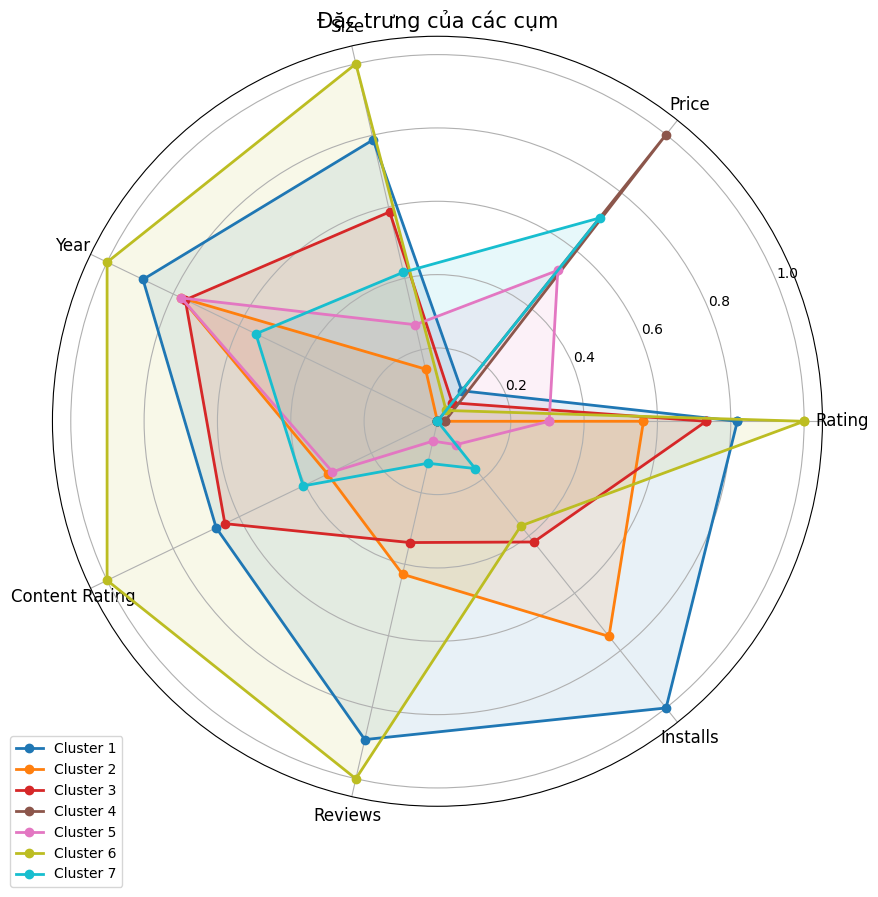

<Figure size 640x480 with 0 Axes>

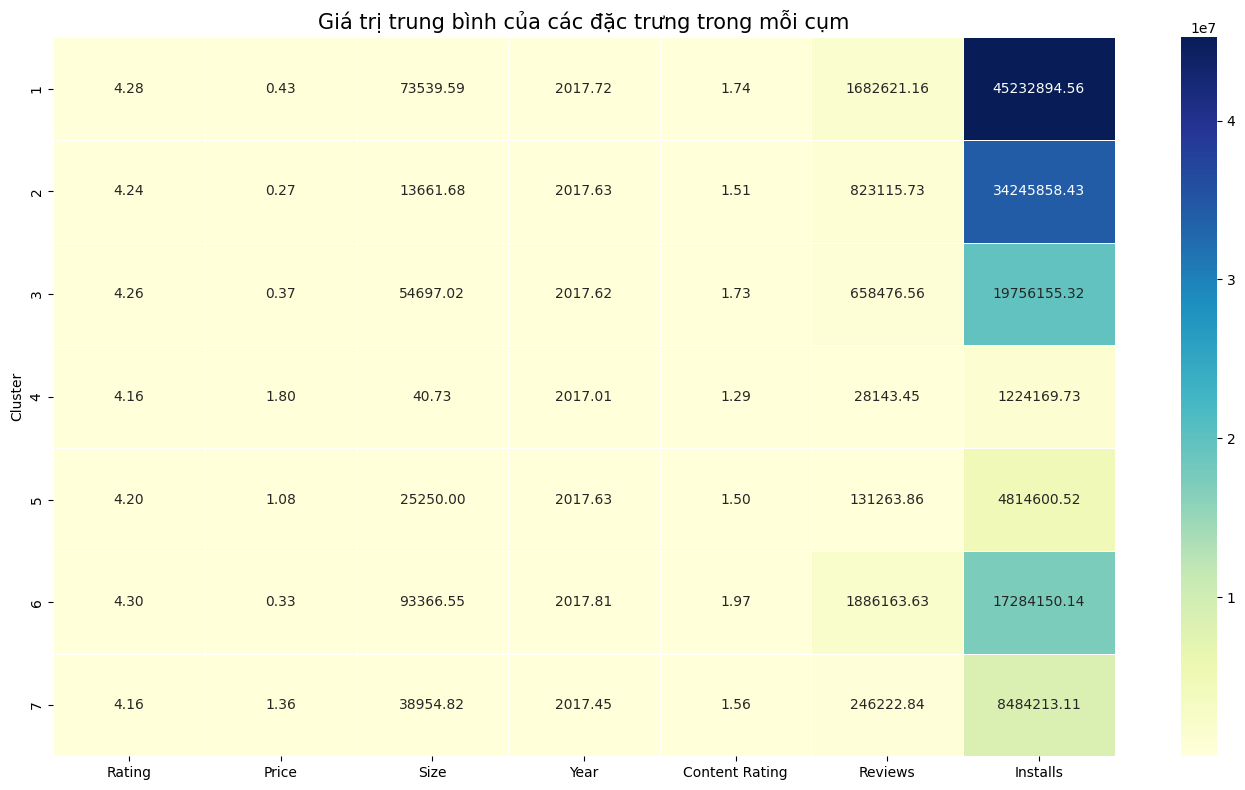

<Figure size 640x480 with 0 Axes>

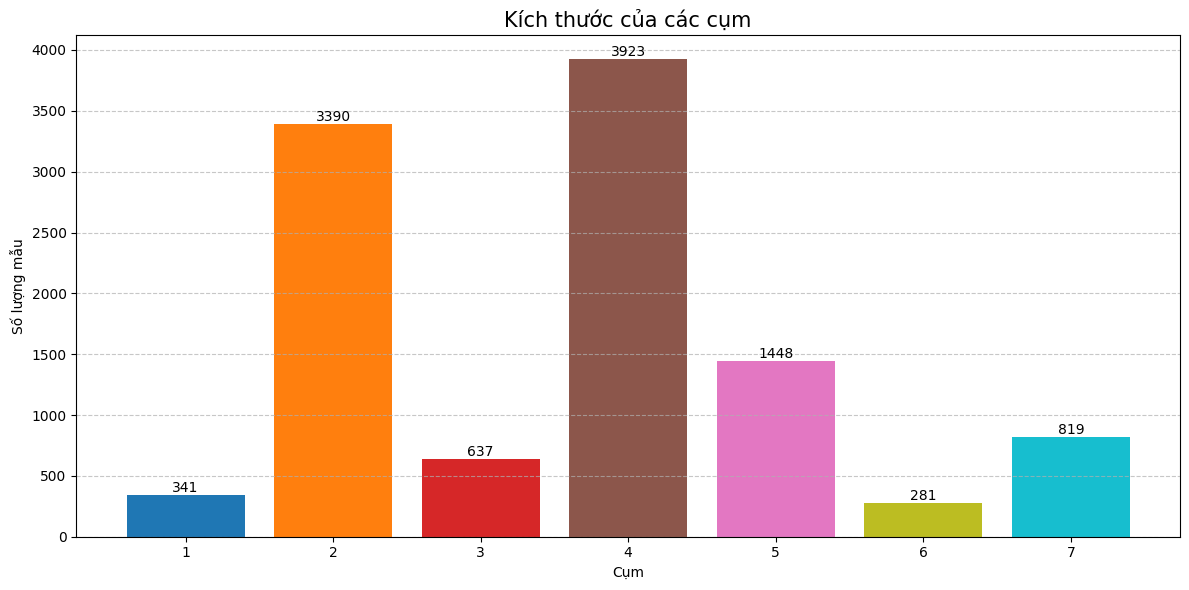

<Figure size 640x480 with 0 Axes>

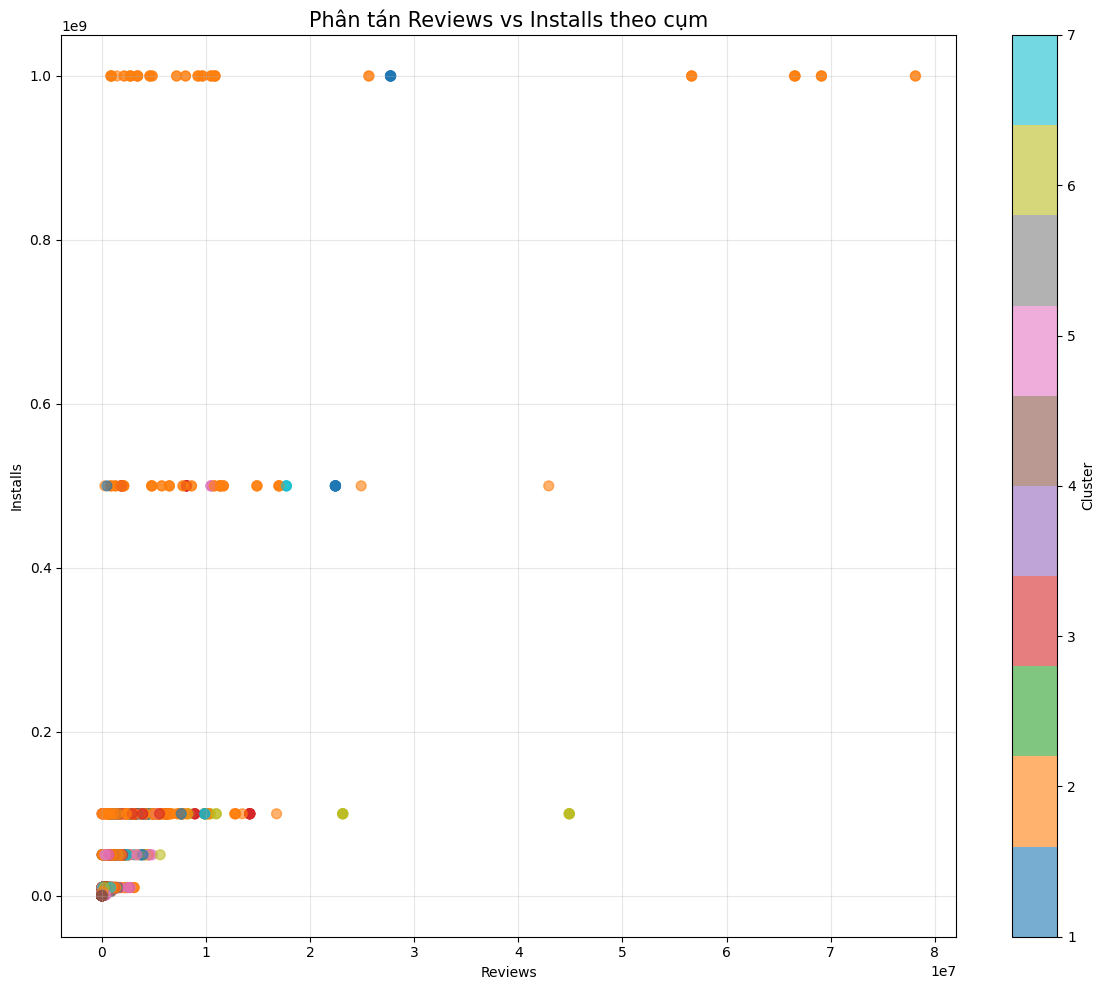

In [ ]:
# 1. Biểu đồ radar cho đặc trưng của mỗi cụm
def radar_chart(df, features, cluster_col='Cluster'):
    # Tính giá trị trung bình của các đặc trưng cho mỗi cụm
    cluster_means = df.groupby(cluster_col)[features].mean()
    
    # Chuẩn hóa giá trị để so sánh
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    cluster_means_scaled = pd.DataFrame(
        scaler.fit_transform(cluster_means),
        index=cluster_means.index,
        columns=features
    )
    
    # Thiết lập biểu đồ
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))
    
    # Số lượng đặc trưng
    N = len(features)
    
    # Góc cho mỗi đặc trưng
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Đóng vòng tròn
    
    # Màu sắc cho các cụm
    n_clusters = len(cluster_means_scaled)
    colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
    
    # Vẽ biểu đồ radar cho mỗi cụm
    for i, (idx, row) in enumerate(cluster_means_scaled.iterrows()):
        values = row.values.tolist()
        values += values[:1]  # Đóng vòng tròn
        
        ax.plot(angles, values, 'o-', linewidth=2, color=colors[i], label=f'Cluster {idx}')
        ax.fill(angles, values, alpha=0.1, color=colors[i])
    
    # Thêm nhãn cho các đặc trưng
    plt.xticks(angles[:-1], features, size=12)
    
    # Thêm tiêu đề và hướng dẫn
    plt.title('Đặc trưng của các cụm', size=15)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return fig

# 2. Biểu đồ heatmap cho giá trị trung bình của các đặc trưng trong mỗi cụm
def cluster_heatmap(df, features, cluster_col='Cluster'):
    # Tính giá trị trung bình của các đặc trưng cho mỗi cụm
    cluster_means = df.groupby(cluster_col)[features].mean()
    
    # Vẽ heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(cluster_means, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
    plt.title('Giá trị trung bình của các đặc trưng trong mỗi cụm', size=15)
    plt.tight_layout()
    
    return plt.gcf()

# 3. Biểu đồ boxplot cho phân phối của từng đặc trưng theo cụm
def cluster_boxplots(df, features, cluster_col='Cluster'):
    # Chuẩn bị dữ liệu dạng dài (long format)
    df_melted = pd.melt(df, id_vars=[cluster_col], value_vars=features,
                         var_name='Feature', value_name='Value')
    
    # Vẽ boxplot
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Feature', y='Value', hue=cluster_col, data=df_melted)
    plt.title('Phân phối của các đặc trưng theo cụm', size=15)
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    
    return plt.gcf()

# 4. Biểu đồ cột cho kích thước của các cụm
def cluster_size_chart(df, cluster_col='Cluster'):
    # Đếm số lượng mẫu trong mỗi cụm
    cluster_sizes = df[cluster_col].value_counts().sort_index()
    
    # Vẽ biểu đồ cột
    plt.figure(figsize=(12, 6))
    bars = plt.bar(cluster_sizes.index, cluster_sizes.values, 
                  color=plt.cm.tab10(np.linspace(0, 1, len(cluster_sizes))))
    
    # Thêm nhãn số lượng trên mỗi cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height}', ha='center', va='bottom')
    
    plt.title('Kích thước của các cụm', size=15)
    plt.xlabel('Cụm')
    plt.ylabel('Số lượng mẫu')
    plt.xticks(cluster_sizes.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return plt.gcf()

# 5. Biểu đồ phân tán với màu theo cụm và kích thước theo đặc trưng quan trọng
def scatter_by_cluster(df, x_col, y_col, size_col=None, cluster_col='Cluster'):
    plt.figure(figsize=(12, 10))
    
    if size_col:
        # Chuẩn hóa kích thước
        sizes = df[size_col]
        size_min = sizes.min()
        size_max = sizes.max()
        # Đảm bảo không chia cho 0
        size_range = size_max - size_min if size_max > size_min else 1
        sizes = 20 + 100 * (sizes - size_min) / size_range
        
        scatter = plt.scatter(df[x_col], df[y_col], 
                             c=df[cluster_col], 
                             s=sizes,
                             cmap='tab10', 
                             alpha=0.6)
        plt.title(f'Phân tán {x_col} vs {y_col} (kích thước: {size_col})', size=15)
    else:
        scatter = plt.scatter(df[x_col], df[y_col], 
                             c=df[cluster_col], 
                             cmap='tab10', 
                             alpha=0.6,
                             s=50)
        plt.title(f'Phân tán {x_col} vs {y_col}', size=15)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()

# 6. Thêm biểu đồ phân tán 2D cho Reviews và Installs theo cụm
def reviews_installs_scatter(df, cluster_col='Cluster'):
    plt.figure(figsize=(12, 10))
    
    scatter = plt.scatter(
        df['Reviews'], 
        df['Installs'], 
        c=df[cluster_col], 
        cmap='tab10', 
        alpha=0.6,
        s=50
    )
    
    plt.title('Phân tán Reviews vs Installs theo cụm', size=15)
    plt.xlabel('Reviews')
    plt.ylabel('Installs')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()

# 7. Phân tích Category theo cụm
def category_distribution(df, cluster_col='Cluster'):
    if 'Category' in df.columns:
        plt.figure(figsize=(16, 12))
        
        # Tính phân phối Category trong mỗi cụm
        category_cluster = pd.crosstab(df[cluster_col], df['Category'])
        category_cluster_pct = category_cluster.div(category_cluster.sum(axis=1), axis=0) * 100
        
        # Vẽ heatmap
        sns.heatmap(category_cluster_pct, cmap='YlOrRd', annot=False, linewidths=.5)
        plt.title('Phân phối Category (%) trong mỗi cụm', size=15)
        plt.xticks(rotation=90)
        plt.tight_layout()
        
        # In top 3 Category cho mỗi cụm
        print("\nTop 3 Category phổ biến nhất trong mỗi cụm:")
        for cluster in sorted(df[cluster_col].unique()):
            cluster_df = df[df[cluster_col] == cluster]
            top_categories = cluster_df['Category'].value_counts().nlargest(3)
            print(f"\nCluster {cluster} (Số lượng ứng dụng: {len(cluster_df)}):")
            for category, count in top_categories.items():
                percentage = (count / len(cluster_df)) * 100
                print(f"  {category}: {count} ({percentage:.2f}%)")
        
        return plt.gcf()
    else:
        print("Không có cột 'Category' trong dữ liệu.")
        return None

# Đảm bảo X_df đã loại bỏ cột Cluster (nếu có) khi phân tích
if 'Cluster' in X_df.columns:
    features = X_df.columns.drop('Cluster').tolist()
else:
    features = X_df.columns.tolist()

# Chọn một số đặc trưng quan trọng nếu có quá nhiều
if len(features) > 8:
    # Chọn những đặc trưng quan trọng nhất
    important_features = ['Rating', 'Reviews', 'Installs', 'Size', 'Content Rating', 'Year', 'Price']
    # Lọc để chỉ giữ những đặc trưng có trong dữ liệu
    selected_features = [f for f in important_features if f in features]
    # Nếu không đủ 8 đặc trưng, thêm các đặc trưng khác
    if len(selected_features) < 8:
        remaining = [f for f in features if f not in selected_features]
        selected_features.extend(remaining[:8-len(selected_features)])
else:
    selected_features = features

# Tạo các biểu đồ
radar_fig = radar_chart(X_df, selected_features)
plt.savefig('cluster_radar_chart.png', dpi=300, bbox_inches='tight')
plt.close()

heatmap_fig = cluster_heatmap(X_df, selected_features)
plt.savefig('cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

boxplot_fig = cluster_boxplots(X_df, selected_features)
plt.savefig('cluster_boxplots.png', dpi=300, bbox_inches='tight')
plt.close()

size_fig = cluster_size_chart(X_df)
plt.savefig('cluster_sizes.png', dpi=300, bbox_inches='tight')
plt.close()

# Biểu đồ phân tán cho Reviews và Installs
if 'Reviews' in X_df.columns and 'Installs' in X_df.columns:
    reviews_installs_fig = reviews_installs_scatter(X_df)
    plt.savefig('reviews_installs_scatter.png', dpi=300, bbox_inches='tight')
    plt.close()

# Phân tích Category
if 'Category' in df_copy.columns:
    category_fig = category_distribution(df_copy)
    plt.savefig('category_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()

# Hiển thị một vài biểu đồ quan trọng
plt.figure()
radar_chart(X_df, selected_features)

plt.figure()
cluster_heatmap(X_df, selected_features)

plt.figure()
cluster_size_chart(X_df)

if 'Reviews' in X_df.columns and 'Installs' in X_df.columns:
    plt.figure()
    reviews_installs_scatter(X_df)

plt.show()

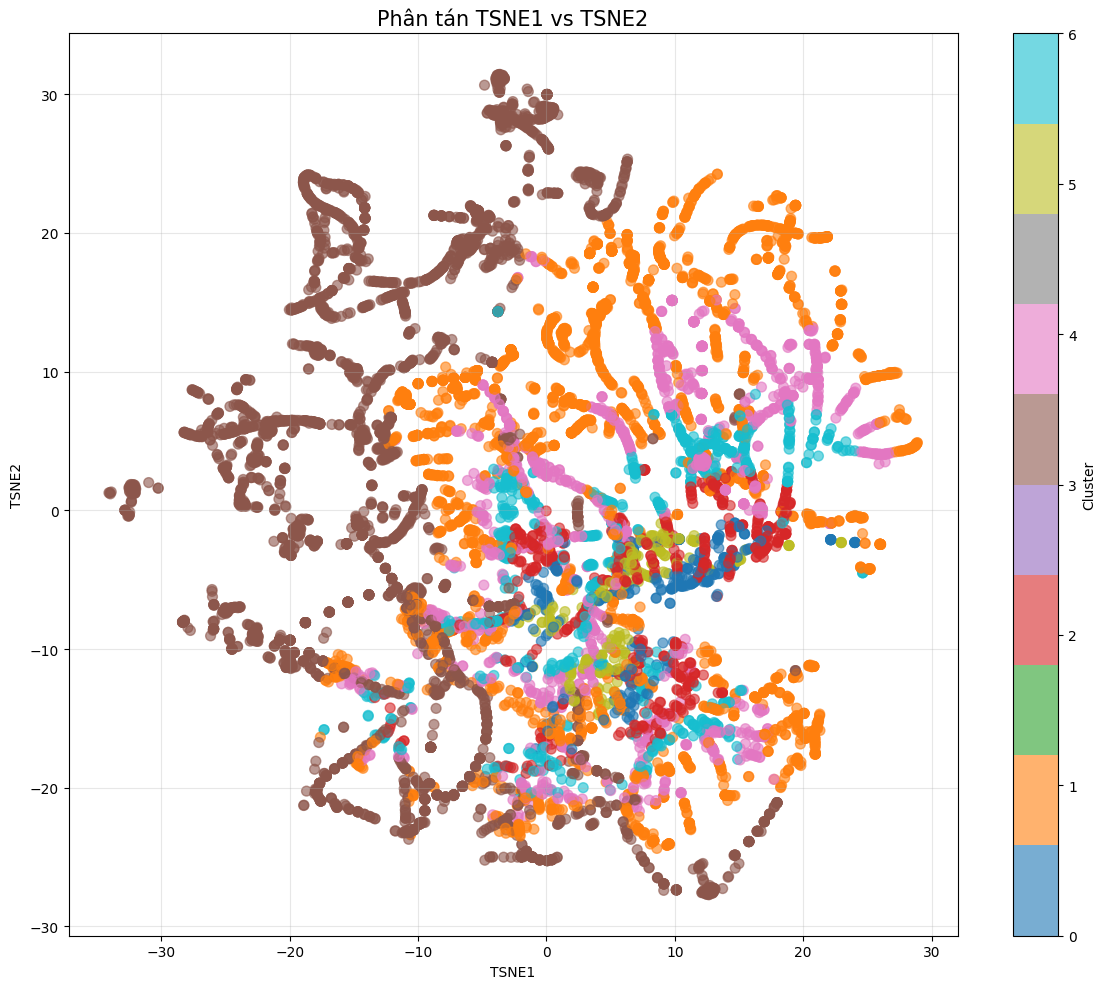

In [ ]:
if 'tsne_df' in locals():
    scatter_fig = scatter_by_cluster(tsne_df, 'TSNE1', 'TSNE2', cluster_col='Cluster')
    plt.savefig('cluster_scatter.png', dpi=300, bbox_inches='tight')

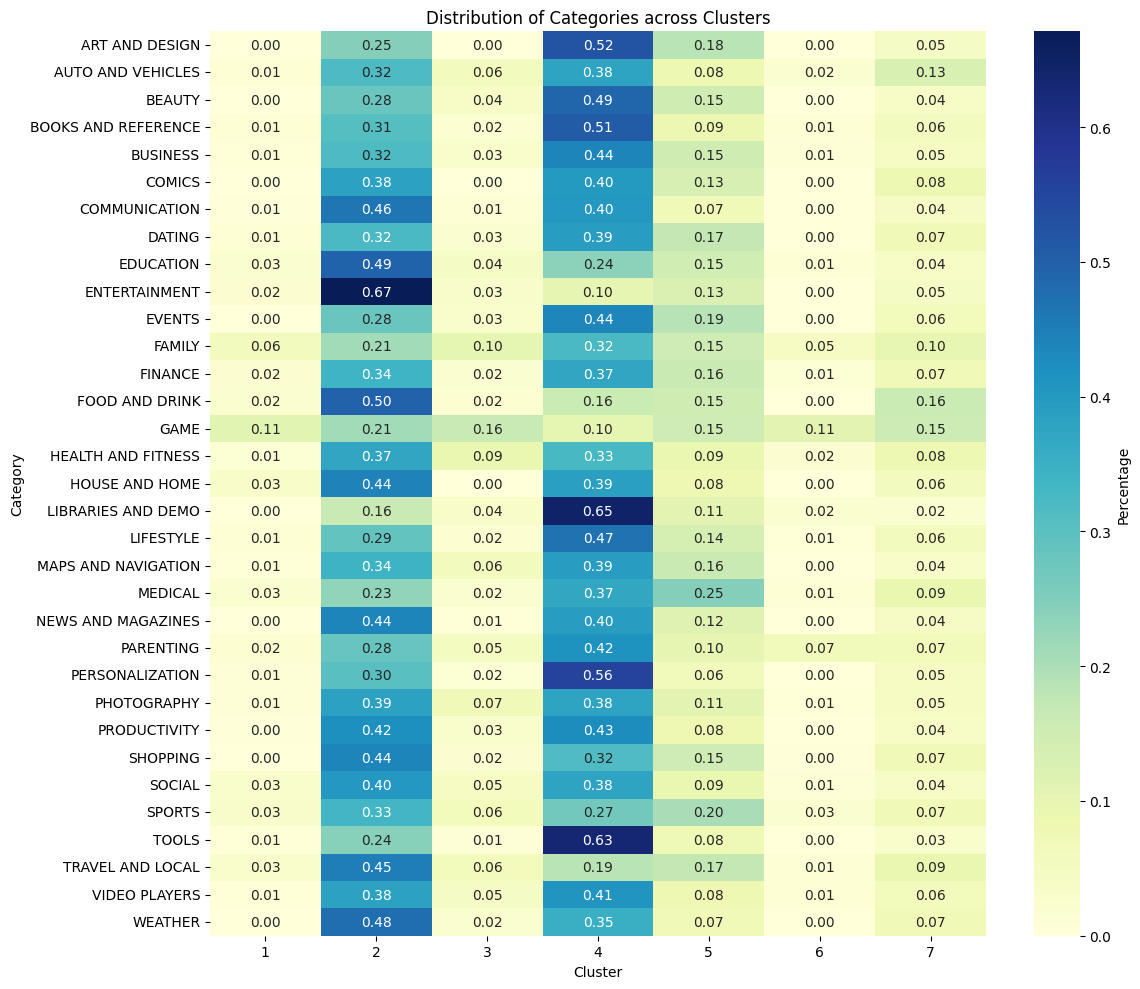

In [ ]:
# Bảng tương quan giữa Category và Cluster
contingency = pd.crosstab(df_copy['Category'], df_copy['Cluster'])

# Normalize theo hàng để thấy phần trăm của mỗi Category trong các Cluster
contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)

# Vẽ heatmap để thấy rõ mối quan hệ
plt.figure(figsize=(12, 10))
sns.heatmap(contingency_norm, cmap="YlGnBu", annot=True, fmt='.2f', cbar_kws={'label': 'Percentage'})
plt.title('Distribution of Categories across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


In [ ]:
# Thêm nhãn cụm vào DataFrame gốc
df_with_clusters = df_copy.copy()
df_with_clusters['Cluster'] = y_kmeans+1

# Lưu ra file CSV
df_with_clusters.to_csv('google_play_clustered.csv', index=False)